### ESTUDIO CONCEPTUAL

El objetivo de este proyecto es predecir el abandono de clientes (churn) en una empresa de telecomunicaciones, analizando los datos de su contrato, los servicios que utilizan y sus patrones de uso.

### Dataset: Abandono de Clientes de Telecomunicaciones
Este conjunto de datos contiene información sobre los clientes de una empresa de telecomunicaciones, con diversos atributos relacionados con sus factores demográficos, detalles del contrato y los servicios que tienen contratados.

Está diseñado para facilitar el análisis en áreas como el comportamiento del cliente, la inteligencia de negocio y el modelado predictivo, con el fin de entender las causas principales del abandono del servicio (churn).

## Descripción de las Características (Features)
**customerID:** (Texto/object) - Identificador único para cada cliente.

**gender:** (Texto/object) - Género del cliente. Valores: "Female", "Male".

**SeniorCitizen:** (Numérico/int64) - Indica si el cliente es mayor (65+ años). Valores: 1 (Sí), 0 (No).

**Partner:** (Texto/object) - Indica si el cliente tiene pareja. Valores: "Yes", "No".

**Dependents:** (Texto/object) - Indica si el cliente tiene dependientes. Valores: "No", "Yes".

**tenure:** (Numérico/int64) - Meses que el cliente ha permanecido en la compañía.

**PhoneService:** (Texto/object) - Indica si el cliente tiene servicio telefónico. Valores: "No", "Yes".

**MultipleLines:** (Texto/object) - Indica si el cliente tiene múltiples líneas. Valores: "No phone service", "No", "Yes".

**InternetService:** (Texto/object) - Tipo de servicio de internet. Valores: "DSL", "Fiber optic", "No".

**OnlineSecurity:** (Texto/object) - Servicio de seguridad online. Valores: "No", "Yes", "No internet service".

**OnlineBackup:** (Texto/object) - Servicio de copia de seguridad online. Valores: "Yes", "No", "No internet service".

**DeviceProtection:** (Texto/object) - Seguro para dispositivos. Valores: "No", "Yes", "No internet service".

**TechSupport:** (Texto/object) - Servicio de soporte técnico. Valores: "No", "Yes", "No internet service".

**StreamingTV:** (Texto/object) - Servicio de streaming de TV. Valores: "No", "Yes", "No internet service".

**StreamingMovies:** (Texto/object) - Servicio de streaming de películas. Valores: "No", "Yes", "No internet service".

**Contract:** (Texto/object) - Tipo de contrato del cliente. Valores: "Month-to-month", "One year", "Two year".

**PaperlessBilling:** (Texto/object) - Facturación sin papel. Valores: "Yes", "No".

**PaymentMethod:** (Texto/object) - Método de pago. Valores: "Electronic check", "Mailed check", etc.

**MonthlyCharges:** (Numérico/float64) - Cargo mensual que paga el cliente.

**TotalCharges:** (Numérico/object) - Cargo total pagado por el cliente hasta la fecha.

**Churn:** (Texto/object) - Variable objetivo, indica si el cliente abandonó la compañía. Valores: "No", "Yes".

### 1. Métricas de Éxito del Proyecto 📈

***Métrica Técnica:*** "El modelo final deberá alcanzar una precisión (accuracy) superior al 80% y, más importante aún, un recall para la clase 'Sí' (clientes que abandonan) superior al 60%. Esto asegura que estamos identificando correctamente a una mayoría significativa de los clientes en riesgo, incluso si eso significa tener algunos falsos positivos."

***Métrica de Negocio:*** "El objetivo es que el modelo permita al equipo de retención contactar al 10% de los clientes con mayor probabilidad de abandono. Se considerará un éxito si, de ese grupo contactado, se logra reducir la tasa de abandono en al menos un 15% en el siguiente trimestre."

### ***Import***

In [1]:
import pandas as pd
import numpy as np 


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### ***Obtencion de datos***

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

--2025-09-20 16:38:13--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘WA_Fn-UseC_-Telco-Customer-Churn.csv’

WA_Fn-UseC_-Telco-C 100%[===================>] 954.59K   645KB/s    in 1.5s    

2025-09-20 16:38:15 (645 KB/s) - ‘WA_Fn-UseC_-Telco-Customer-Churn.csv’ saved [977501/977501]



In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [15]:
df.sample(5)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
4150,0187-qsxoe,male,1,yes,no,7,yes,no,fiber_optic,no,...,no,no,yes,yes,month-to-month,yes,electronic_check,89.00,605.45,no
5537,8029-xypwt,male,1,yes,no,71,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,bank_transfer_(automatic),115.05,8016.60,no
3988,6194-hbgqn,male,0,no,no,51,yes,yes,dsl,yes,...,yes,yes,yes,no,one_year,yes,credit_card_(automatic),81.15,4126.20,no
725,6549-ymfaw,male,1,yes,no,9,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,yes,mailed_check,21.25,204.55,no
3771,5960-wpxqm,male,0,no,no,1,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,79.05,79.05,yes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   object 
 4   dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   object 
 7   multiplelines     7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  onlinebackup      7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  techsupport       7032 non-null   object 
 13  streamingtv       7032 non-null   object 
 14  streamingmovies   7032 non-null   object 
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null   object 
 17  

### Limpieza

In [ ]:
# Normalizacion de las columnas
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
# Normalizacion de los regitros
columnas_categoricas = df.select_dtypes(include='object').columns
for col in columnas_categoricas:
    df[col] = df[col].str.lower().str.strip().str.replace(' ', '_')

In [11]:
# Intentar convertir a número. Los valores que fallen se volverán NaN.
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

In [ ]:
# Eliminacion de los registros con NaN en totalcharges
df = df.dropna(subset=['totalcharges'])

In [ ]:
# Conteo de niveles en las diferentes columnas categoricas
for columna in columnas_categoricas:
    print(f"Columna {columna} : {df[columna].nunique()} subniveles")
    

Columna gender : 2 subniveles
Columna partner : 2 subniveles
Columna dependents : 2 subniveles
Columna phoneservice : 2 subniveles
Columna multiplelines : 3 subniveles
Columna internetservice : 3 subniveles
Columna onlinesecurity : 3 subniveles
Columna onlinebackup : 3 subniveles
Columna deviceprotection : 3 subniveles
Columna techsupport : 3 subniveles
Columna streamingtv : 3 subniveles
Columna streamingmovies : 3 subniveles
Columna contract : 3 subniveles
Columna paperlessbilling : 2 subniveles
Columna paymentmethod : 4 subniveles
Columna churn : 2 subniveles


In [ ]:
# Liempieza de columna irrelevante

# Muestra el tamaño antes de eliminar
print("Columnas originales:", df.shape[1])

# Elimina la columna 'customerid'
df = df.drop(columns=['customerid'])

# Verifica que la columna ya no está
print("Columnas después de eliminar:", df.shape[1])
print(df.columns)

Columnas originales: 21
Columnas después de eliminar: 20
Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


In [24]:
# Estadistica descriptiva
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# Eliminando filas repetidas
print(f'Tamaño que se tiene antes de eliminar duplicados: {df.shape}')
df = df.drop_duplicates()
print(f'Tamaño que se tiene despues de eliminar duplicados: {df.shape}')

Tamaño que se tiene antes de eliminar duplicados: (7032, 20)
Tamaño que se tiene despues de eliminar duplicados: (7010, 20)


--- Generando Boxplots para Variables Numéricas ---


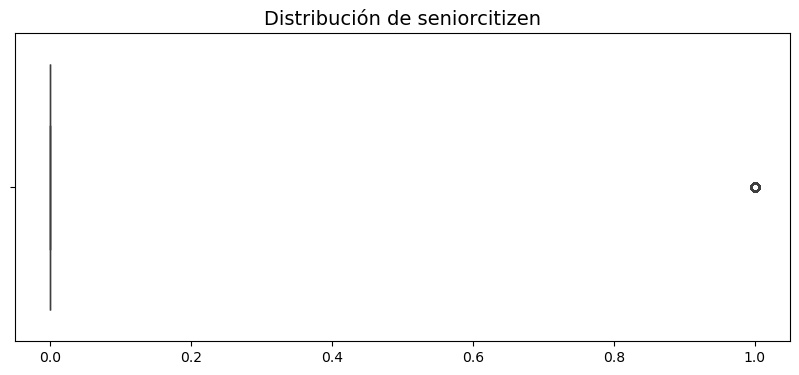

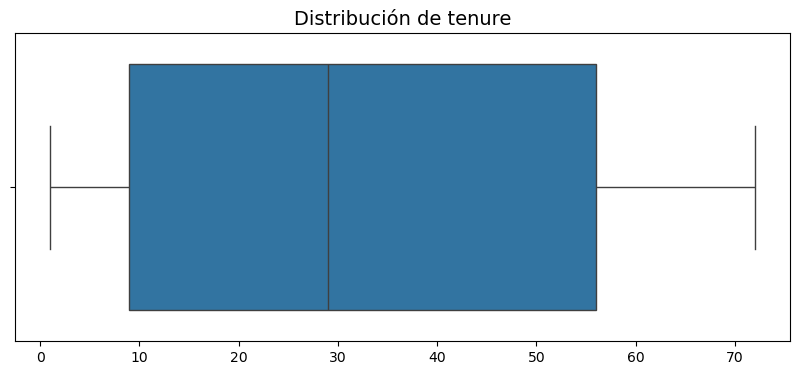

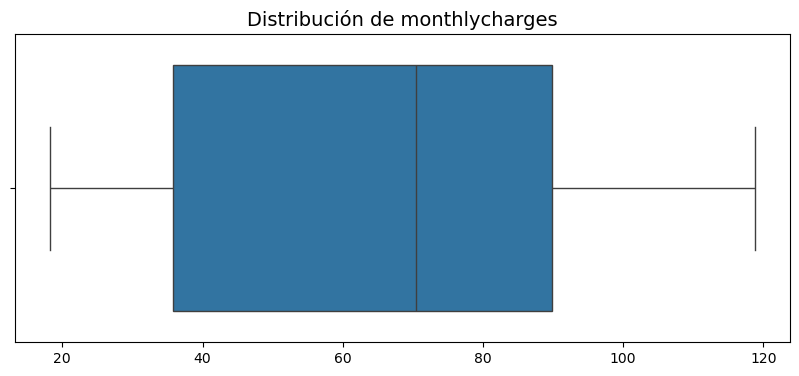

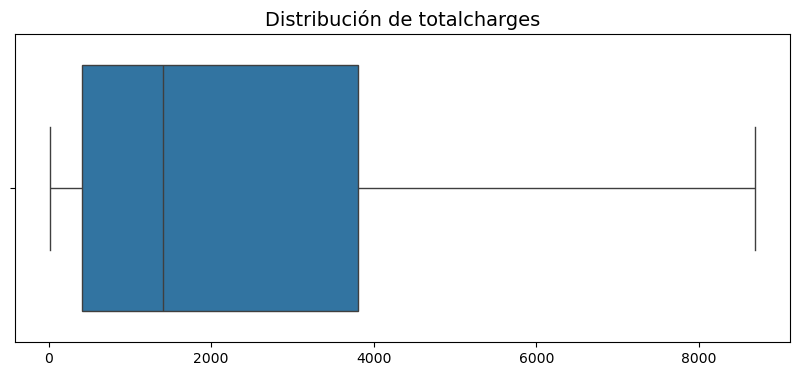

In [ ]:
# Outaliers

columas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
print("--- Generando Boxplots para Variables Numéricas ---")
for columna in columas_numericas:
    plt.figure(figsize=(10, 4)) # Crea una nueva figura para cada gráfico, para que no se superpongan
    sns.boxplot(data=df, x=columna)
    plt.title(f'Distribución de {columna}', fontsize=14)
    plt.xlabel('') # Opcional: puedes quitar la etiqueta del eje x si el título ya es claro
    plt.show()

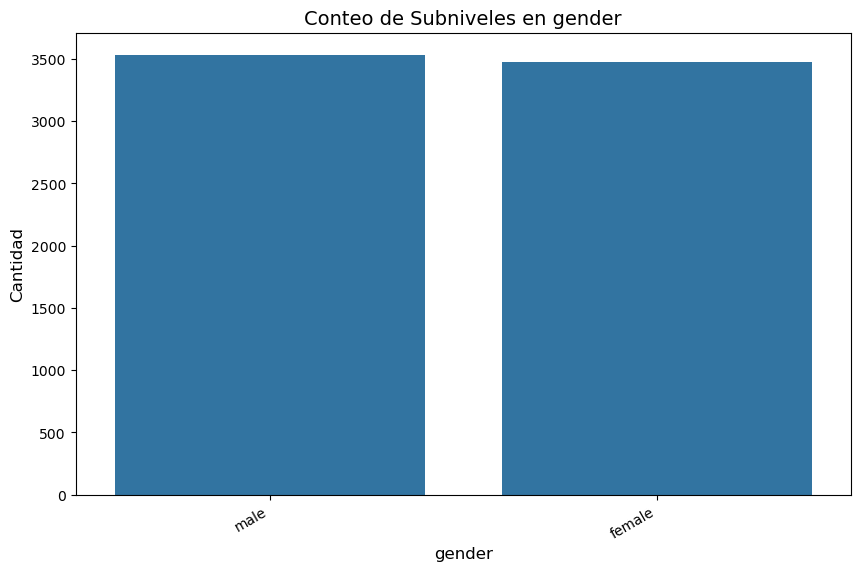

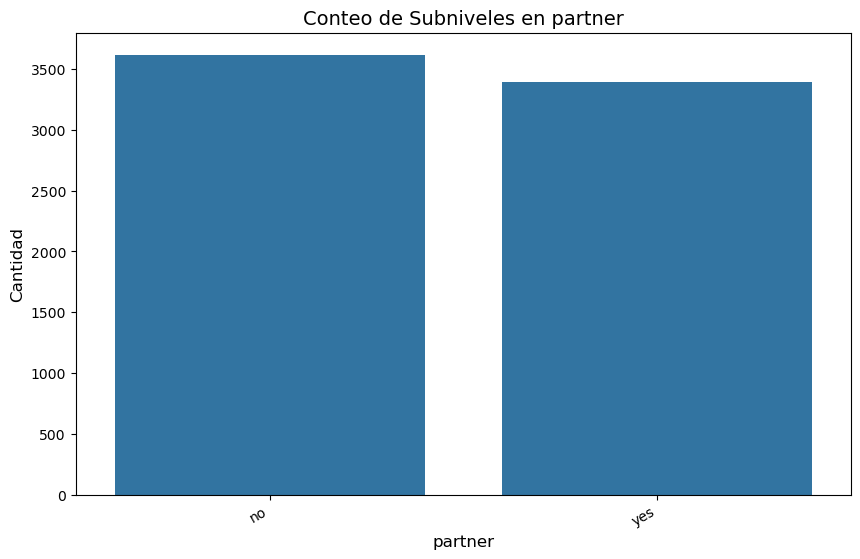

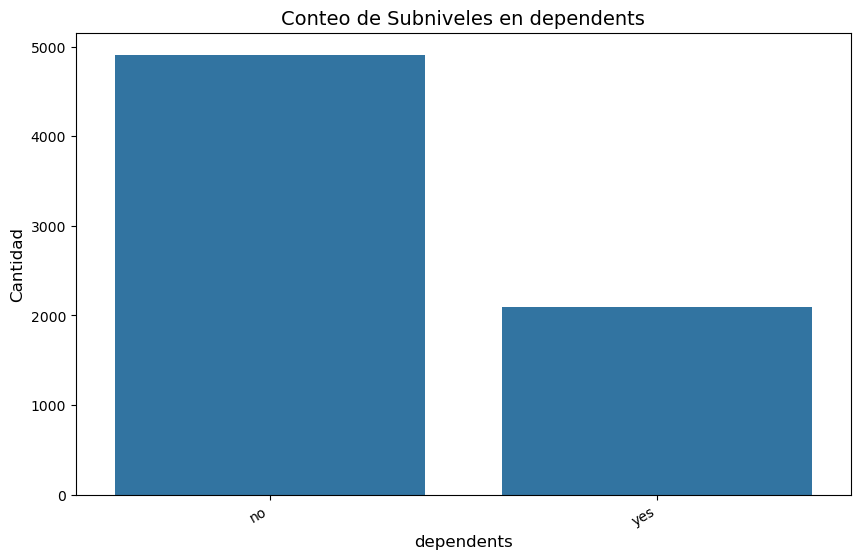

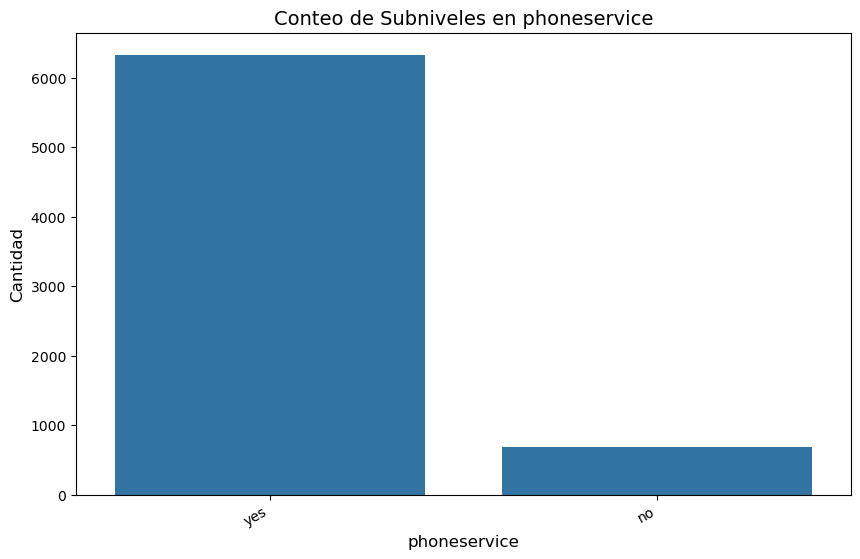

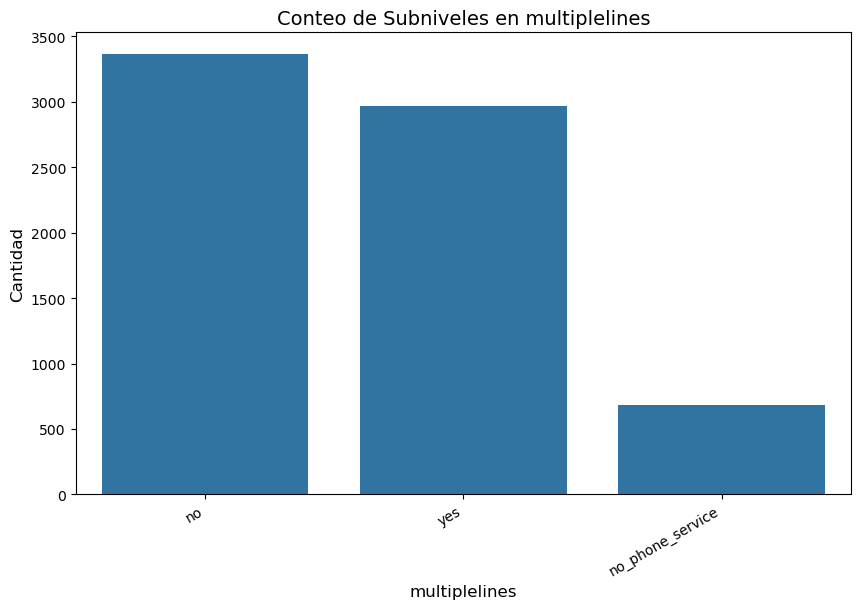

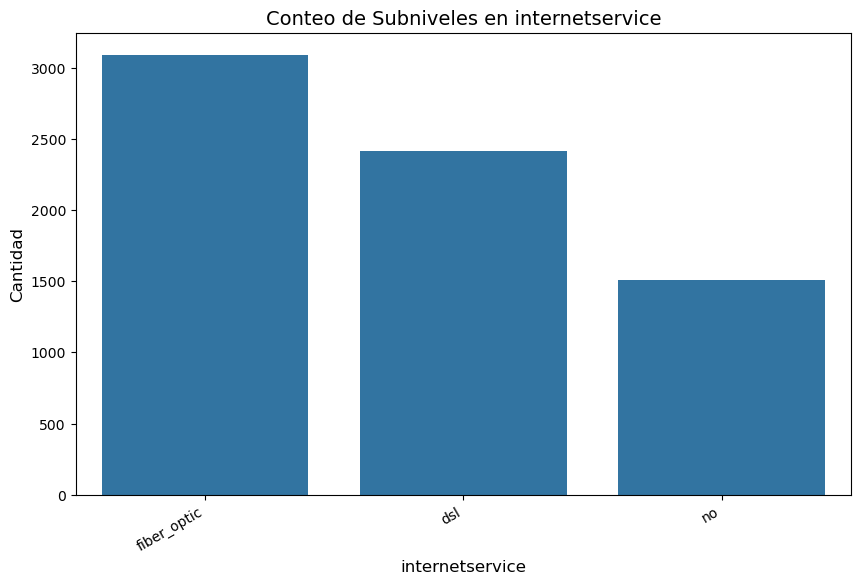

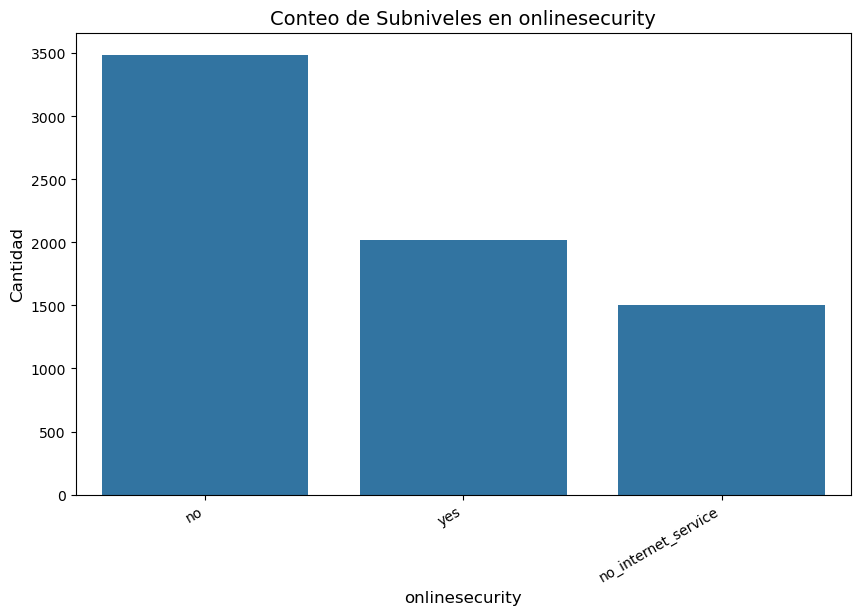

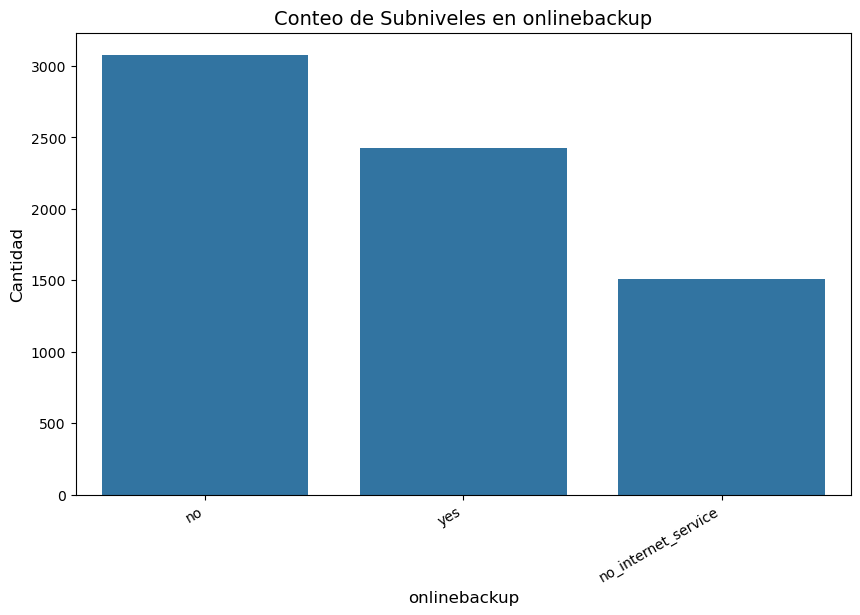

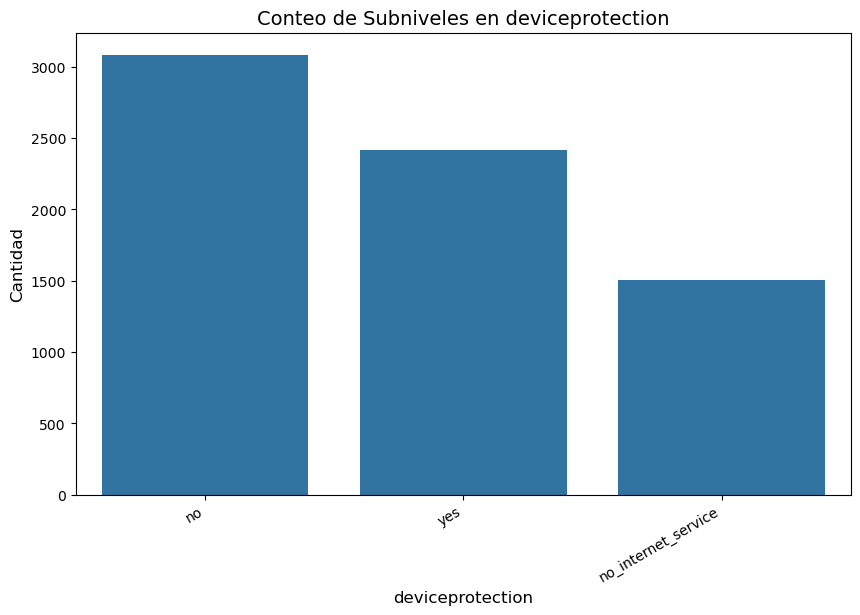

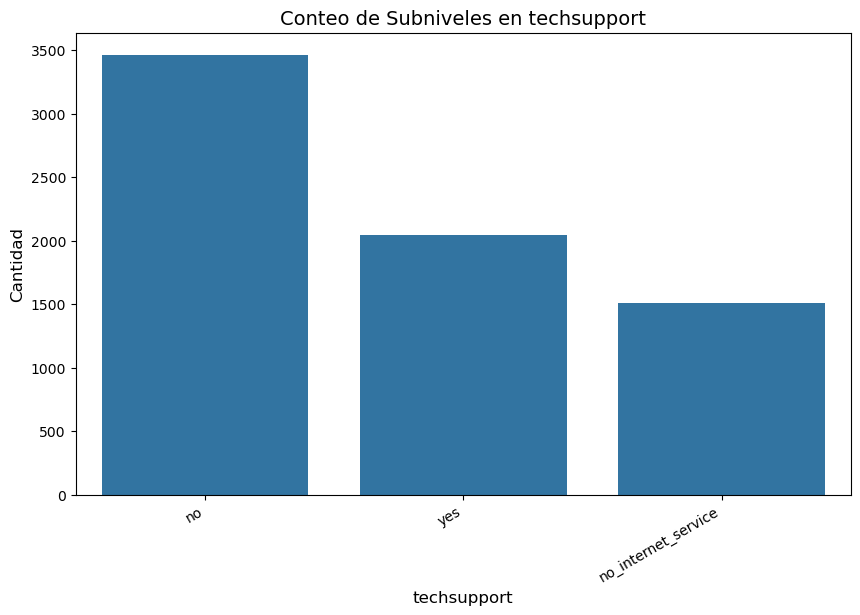

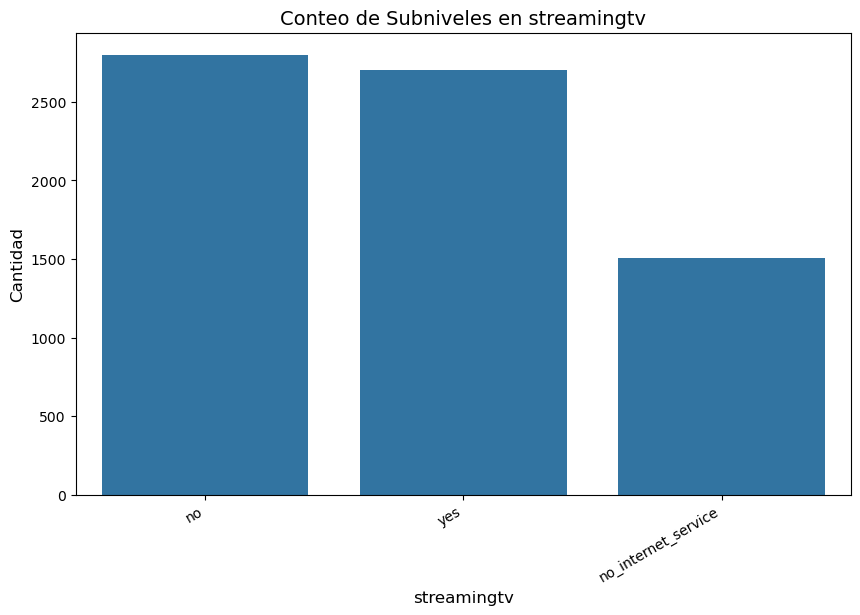

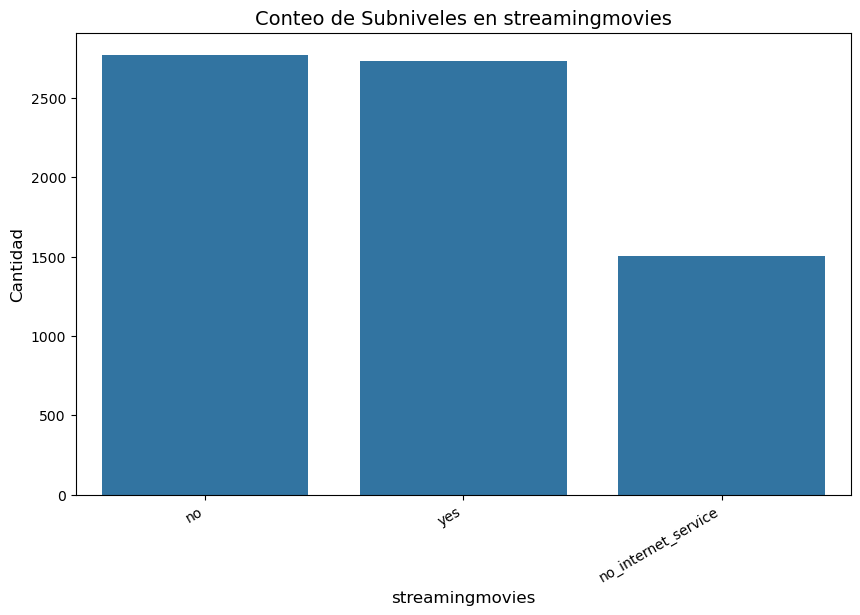

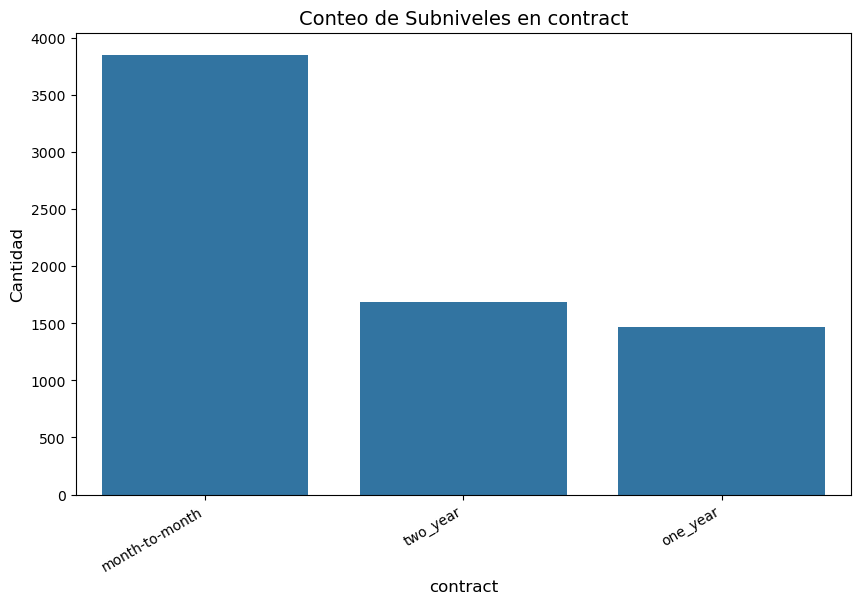

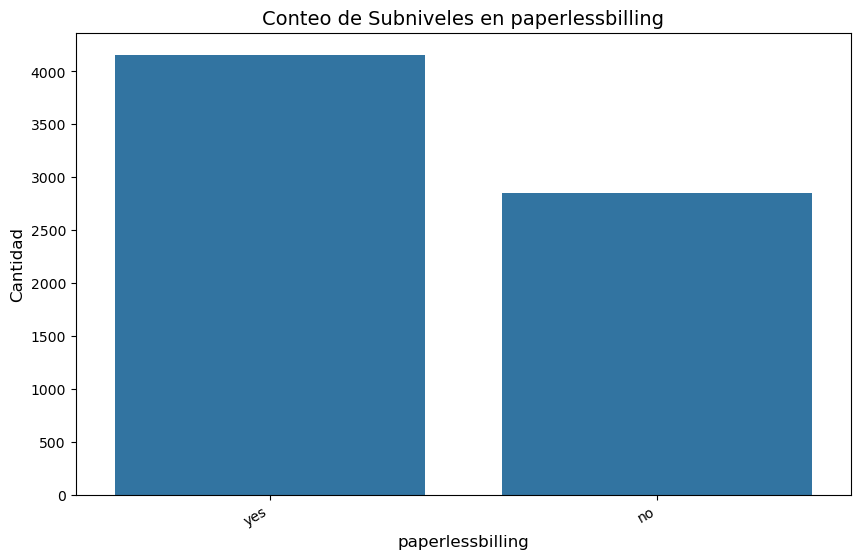

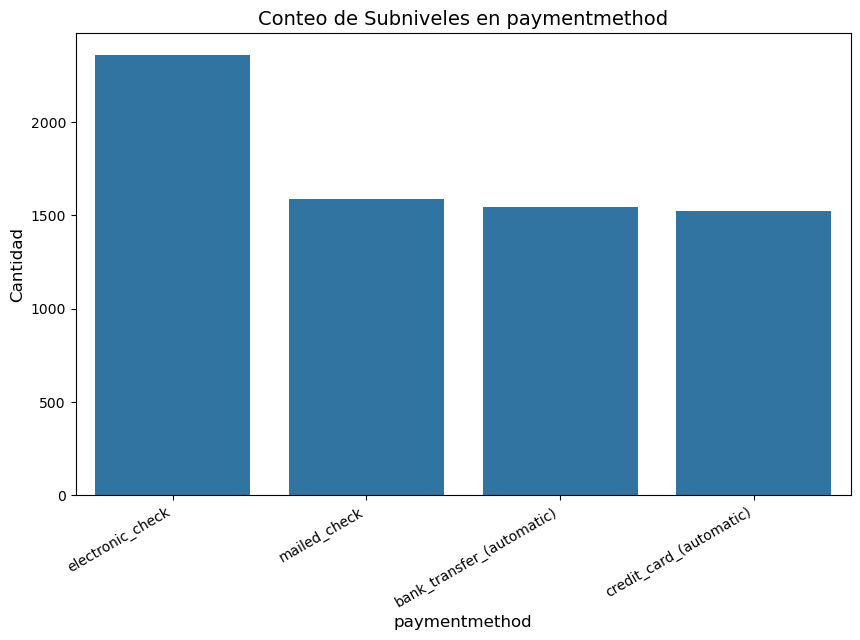

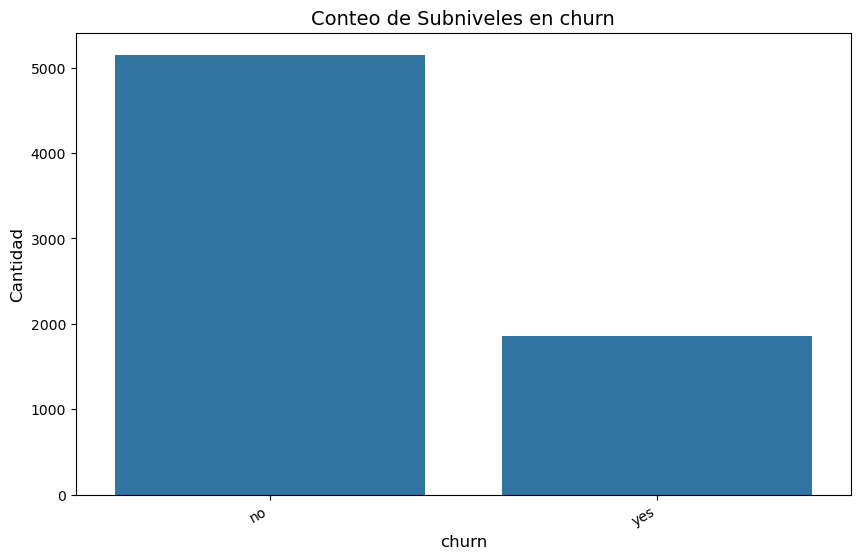

In [36]:
# Conteo de niveles de las variables categoricas
for columna in columnas_categoricas:
    plt.figure(figsize=(10, 6)) # Crea una nueva figura para cada gráfico
    
    # Dibuja el gráfico con las categorías en el eje X
    sns.countplot(x=columna, data=df, order = df[columna].value_counts().index)
    
    plt.title(f'Conteo de Subniveles en {columna}', fontsize=14)
    plt.ylabel('Cantidad', fontsize=12)
    plt.xlabel(columna, fontsize=12)
    
    # Rota las etiquetas del eje X para que no se superpongan
    plt.xticks(rotation=30, ha='right') # ha='right' alinea el texto para que se vea mejor
    
    plt.show()